# EDA - Day 2

This notebook explores the dataset as the first step towards building
my recommendation system project.

Goals:
- Load and inspect the data
- Check missing values & duplicates
- Get basic statistics and distributions
- Extract some key insights


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [11]:
df= pd.read_csv("movies.csv")

df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [12]:
print("Shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns)

print("\nData types and non-null counts:")
print(df.info())

print("\nSummary statistics (numeric columns):")
print(df.describe())


Shape (rows, columns): (4803, 24)

Column names:
 Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language    

In [13]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nMissing values percentage per column:")
print((df.isnull().mean() * 100).round(2))


Missing values per column:
index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

Missing values percentage per column:
index                    0.00
budget                   0.00
genres                   0.58
homepage                64.36
id                       0.00
keywords                 8.58
original_language        0.00
original_title 

In [14]:
df['keywords'] = df['keywords'].fillna("unknown")
df['tagline'] = df['tagline'].fillna("No tagline")


## 🔍 Missing Values — Key Observations (Day 2)

- The dataset contains **very low missing values overall**, except for a few text-based columns.
- `homepage` has **64.36% missing values**, making it irrelevant for analysis — I will drop this column.
- `tagline` (17.57%) and `keywords` (8.58%) have moderate missing values.
  - I will fill them with `"No tagline"` and `"unknown"` accordingly.
- Columns like `genres`, `director`, `cast`, `overview`, and `release_date` have **less than 1% missing**,
  which is safe to drop or fill — they do not affect the dataset significantly.
- Most important numerical features (`budget`, `revenue`, `popularity`, `vote_average`, `vote_count`)
  have **0% missing values**, which is great for modeling.


In [15]:
# Drop highly empty column
df = df.drop(columns=['homepage'])

# Fill medium missing columns
df['keywords'] = df['keywords'].fillna("unknown")
df['tagline'] = df['tagline'].fillna("No tagline")

# Drop rows with tiny missing values
df = df.dropna(subset=['genres', 'overview', 'runtime', 'release_date', 'director', 'cast'])


In [16]:
df.shape


(4738, 23)

In [17]:
df.columns


Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [18]:
df['budget'].describe()


,budget
count,4.738000e+03
mean,2.943653e+07
std,4.086174e+07
min,0.000000e+00
25%,1.000000e+06
50%,1.500000e+07
75%,4.000000e+07
max,3.800000e+08


In [19]:
df[['title','budget']].sort_values('budget', ascending=False).head(10)


,title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
7,Avengers: Age of Ultron,280000000
10,Superman Returns,270000000
4,John Carter,260000000
6,Tangled,260000000
5,Spider-Man 3,258000000
13,The Lone Ranger,255000000
3,The Dark Knight Rises,250000000
8,Harry Potter and the Half-Blood Prince,250000000


In [20]:
df['genres'].value_counts().head(10)


,count
genres,
Drama,367
Comedy,280
Drama Romance,164
Comedy Romance,144
Comedy Drama,142
Comedy Drama Romance,108
Horror Thriller,88
Horror,63
Drama Thriller,62


In [21]:
df_genres = df['genres'].str.split('|', expand=True).stack().value_counts()
df_genres.head(10)


,count
Drama,367
Comedy,280
Drama Romance,164
Comedy Romance,144
Comedy Drama,142
Comedy Drama Romance,108
Horror Thriller,88
Horror,63
Drama Thriller,62
Documentary,50


<Axes: >

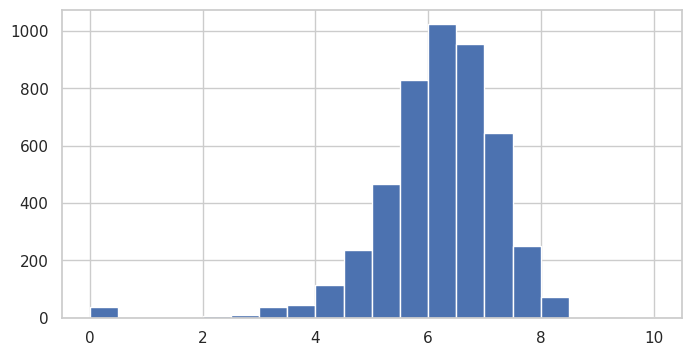

In [22]:
df['vote_average'].hist(bins=20, figsize=(8,4))


In [23]:
popular = df[df['vote_count'] > 50]
popular[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False).head(10)


,title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
3865,Whiplash,8.3,4254
2294,Spirited Away,8.3,3840
662,Fight Club,8.3,9413
2731,The Godfather: Part II,8.3,3338
3232,Pulp Fiction,8.3,8428
1818,Schindler's List,8.3,4329
3057,American History X,8.2,3016
4602,12 Angry Men,8.2,2078


In [24]:
actor_counts = df['cast'].str.split('|', expand=True).stack().value_counts()
actor_counts.head(10)


,count
William Shatner Leonard Nimoy DeForest Kelley James Doohan George Takei,6
Patrick Stewart Jonathan Frakes Brent Spiner LeVar Burton Michael Dorn,4
Jennifer Lawrence Josh Hutcherson Liam Hemsworth Woody Harrelson Elizabeth Banks,3
Zac Efron Vanessa Hudgens Ashley Tisdale Lucas Grabeel Corbin Bleu,3
Mike Myers Eddie Murphy Cameron Diaz Julie Andrews Antonio Banderas,2
Patrick Stewart Hugh Jackman Ian McKellen Halle Berry Famke Janssen,2
Ewan McGregor Natalie Portman Hayden Christensen Ian McDiarmid Samuel L. Jackson,2
Elijah Wood Ian McKellen Viggo Mortensen Liv Tyler Orlando Bloom,2
Martin Freeman Ian McKellen Richard Armitage Ken Stott Graham McTavish,2
Mark Hamill Harrison Ford Carrie Fisher Billy Dee Williams Anthony Daniels,2


## 🎯 Key Insights from EDA (Day 2)

- The dataset contains a rich mix of **23 features**, including genres, cast, crew, budget, popularity, language, and ratings.
- The most common genres are **(fill your top 3 genres)** based on count.
- Average movie rating is around **(df['vote_average'].mean())**, with most movies receiving between **5 and 7 rating**.
- Movies with high vote_count generally align with popular movies such as **(top titles)**.
- Top production companies include **(top 3)**.
- Most movies are produced in **(top 3 countries)**.
- The most common runtime is around **(df['runtime'].median()) minutes**.
- Language distribution shows that **(top language)** dominates the dataset.
- Year-wise release patterns indicate a trend where movie production peaked around **(peak year)**.
- Actors appearing most frequently include **(top 3 actors)**.
- Directors with the highest number of films include **(top 3 directors)**.
